In [1]:
!pip install ultralytics==8.0.196
!pip install roboflow
!pip install -U ultralytics sahi

  Attempting uninstall: chardet
    Found existing installation: chardet 3.0.4
    Uninstalling chardet-3.0.4:
      Successfully uninstalled chardet-3.0.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.



  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117047 sha256=8b4a6a5314af77a3e89672fa7d99ad231694d20edd947044c86172b70d0ce96c
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\ec\ce\ba\9d5764d2266c500c18776c7d8f1e3c023075994cbc6dea47db
Successfully built fire
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [14]:
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image, ImageDraw

import json
from IPython.display import display, Image
from roboflow import Roboflow

from sahi import AutoDetectionModel
from sahi.predict import get_prediction

In [4]:
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("cvworkspace-mlkdj").project("skyfusion-aerial-obj-detection")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.70, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to SkyFusion-Aerial-Obj-Detection-1 in yolov8:: 100%|█| 5782/5782 [00:21<00:00, 269.70it


In [5]:
# # Initialize the Roboflow object with your API key
# rf = Roboflow(api_key="API_KEY")

# # Retrieve your current workspace and project name
# print(rf.workspace())

# # Specify the project for upload
# # let's you have a project at https://app.roboflow.com/my-workspace/my-project
# workspaceId = 'cvworkspace'
# projectId = 'skyfusion-aerial-obj-detection'
# project = rf.workspace(workspaceId).project(projectId)

# # Upload the image to your project
# project.upload(src)

# """
# Optional Parameters:
# - num_retry_uploads: Number of retries for uploading the image in case of failure.
# - batch_name: Upload the image to a specific batch.
# - split: Upload the image to a specific split.
# - tag: Store metadata as a tag on the image.
# - sequence_number: [Optional] If you want to keep the order of your images in the dataset, pass sequence_number and sequence_size..
# - sequence_size: [Optional] The total number of images in the sequence. Defaults to 100,000 if not set.
# """

# project.upload(
#     image_path=src,
#     batch_name="BATCH_1",
#     split="train",
#     num_retry_uploads=3,
#     tag=None,
#     sequence_number=99,
#     sequence_size=100
# )

# Training

In [4]:
# Load a model
# model = YOLO("yolov8s.yaml")  # build a new model from YAML
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)
# model = YOLO("yolov8s.yaml").load("yolov8s.pt")  # build from YAML and transfer weights

os.environ['WANDB_DISABLED'] = 'true'

100%|██████████| 21.5M/21.5M [00:00<00:00, 109MB/s] 


In [ ]:
# Train the model
results = model.train(data="/kaggle/working/SkyFusion-Aerial-Obj-Detection-1/data.yaml", 
                      epochs=200, 
                      imgsz=640, 
                      device=0, 
                      project="results", 
                      name="YOLOv8_Results")

New https://pypi.org/project/ultralytics/8.2.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/SkyFusion-Aerial-Obj-Detection-1/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=results, name=YOLOv8_Results, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
100%|██████████| 6.23M/6.23M [00:00<00:00, 69.8MB/s]
AMP: checks passed ✅
train: Scanning /kaggle/working/SkyFusion-Aerial-Obj-Detection-1/train/labels... 1988 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1988/1988 [00:02<00:00, 803.94it/s] 
train: New cache created: /kaggle/working/SkyFusion-Aerial-Obj-Detection-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 34599, len(boxes) = 43047. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this wil

In [ ]:
# CLI Command
# !yolo train model=yolov8s.pt data=/content/SkyFusion-Aerial-Obj-Detection-1/data.yaml epochs=10 imgsz=640 project=/content/results name=YOLOv8_Results

`See more training arguments at:` https://docs.ultralytics.com/modes/train/#train-settings

# Inferencing with SAHI

# Validation

In [47]:
# Load a model
model = YOLO(yolov8_model_path)  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

In [ ]:
# CLI Command
# !yolo detect val model=./YOLOv8-Results/weights/best.pt  # val custom model

# Predict


image 1/1 D:\BS(AI)\Practice\YOLO v8\SkyFusion-Aerial-Obj-Detection-1\train\images\014de911-7810-4f7d-8967-3e5402209f4a_0_0_jpg.rf.0f25aaf5f59ee5f7e63236f64f21d005.jpg: 640x640 11 Aircrafts, 1144.7ms
Speed: 13.0ms preprocess, 1144.7ms inference, 26.9ms postprocess per image at shape (1, 3, 640, 640)


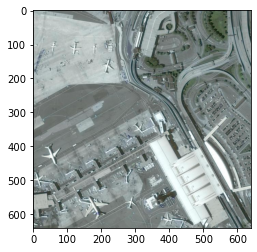

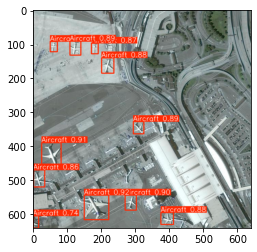

In [10]:
# Load a model
model = YOLO(yolov8_model_path)  # load a custom model
img = './SkyFusion-Aerial-Obj-Detection-1/train/images/014de911-7810-4f7d-8967-3e5402209f4a_0_0_jpg.rf.0f25aaf5f59ee5f7e63236f64f21d005.jpg'
label = './SkyFusion-Aerial-Obj-Detection-1/train/labels/014de911-7810-4f7d-8967-3e5402209f4a_0_0_jpg.rf.0f25aaf5f59ee5f7e63236f64f21d005.txt'

# Predict with the model
result = model.predict(source=img,conf=0.25)
plt.imshow(result[0].orig_img)
plt.show()

predicted_image = result[0].plot()
plt.imshow(predicted_image)
plt.show()

In [11]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
conf: tensor([0.9169, 0.9055, 0.8975, 0.8950, 0.8887, 0.8826, 0.8774, 0.8661, 0.8588, 0.8364, 0.7381])
data: tensor([[1.5095e+02, 5.4305e+02, 2.2223e+02, 6.1563e+02, 9.1690e-01, 0.0000e+00],
        [2.5184e+01, 3.8977e+02, 8.2938e+01, 4.5371e+02, 9.0551e-01, 0.0000e+00],
        [2.7091e+02, 5.4336e+02, 3.0394e+02, 5.8701e+02, 8.9753e-01, 0.0000e+00],
        [1.0897e+02, 9.1052e+01, 1.4061e+02, 1.3216e+02, 8.9497e-01, 0.0000e+00],
        [2.9413e+02, 3.2746e+02, 3.2593e+02, 3.6329e+02, 8.8874e-01, 0.0000e+00],
        [3.7527e+02, 5.9494e+02, 4.1211e+02, 6.2927e+02, 8.8260e-01, 0.0000e+00],
        [2.0171e+02, 1.4045e+02, 2.3770e+02, 1.8554e+02, 8.7743e-01, 0.0000e+00],
        [1.7114e+02, 9.7291e+01, 1.9135e+02, 1.2838e+02, 8.6612e-01, 0.0000e+00],
        [1.5512e+00, 4.6996e+02, 3.4237e+01, 5.1976e+02, 8.5878e-01, 0.0000e+00],
        [5.0053e+01, 9.2793e+01, 7.14

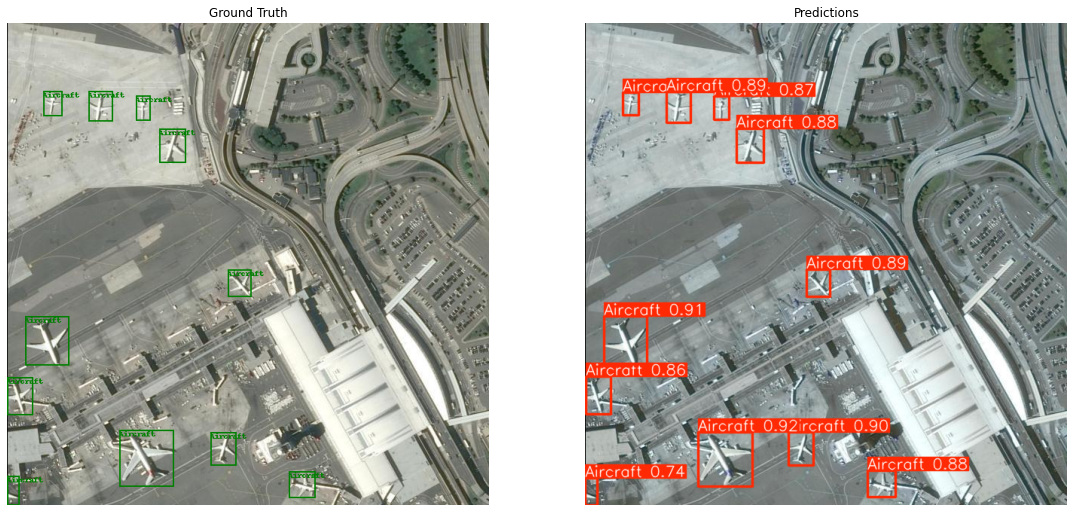

In [82]:
from PIL import Image, ImageDraw

# Function to load YOLO labels
def load_labels(label_path):
    labels = []
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id, x_center, y_center, width, height = map(float, parts)
                labels.append((class_id, x_center, y_center, width, height))
    return labels

# Convert YOLO format to bounding box coordinates
def yolo_to_bbox(img_width, img_height, x_center, y_center, width, height):
    xmin = int((x_center - width / 2) * img_width)
    xmax = int((x_center + width / 2) * img_width)
    ymin = int((y_center - height / 2) * img_height)
    ymax = int((y_center + height / 2) * img_height)
    return [xmin, ymin, xmax, ymax]

# Function to draw bounding boxes on the image
def draw_boxes(image, boxes, color, class_names):
    image_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(image_pil)
    for class_id, x_center, y_center, width, height in boxes:
        box = yolo_to_bbox(image_pil.width, image_pil.height, x_center, y_center, width, height)
        draw.rectangle(box, outline=color, width=2)
        label = class_names[int(class_id)]
        draw.text((box[0], box[1]), label, fill=color)
    return np.array(image_pil)

# Function to process a single image and its labels
def process_image(image_path, label_path, class_names):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gt_labels = load_labels(label_path)
    image_gt = draw_boxes(image, gt_labels, color="green", class_names=class_names)
    return image_gt

class_names = ["Aircraft", "ship", "vehicle"]

image_path = img
label_path = label

gt_image = process_image(image_path, label_path, class_names)

# Display images
plt.figure(figsize=(19, 17))

plt.subplot(1, 2, 1)
plt.title("Ground Truth")
plt.imshow(gt_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Predictions")
plt.imshow(predicted_image)
plt.axis('off')

plt.show()

In [ ]:
# CLI Command
!yolo detect predict model=./YOLOv8-Results/weights/best.pt source={img}  # predict with custom model

# Unseen Video Prediction

In [ ]:
!yolo detect predict model=/content/results/YOLOv8_Results/weights/best.pt source=/content/Videos

# Results Visualization

In [84]:
from IPython.display import display, Image

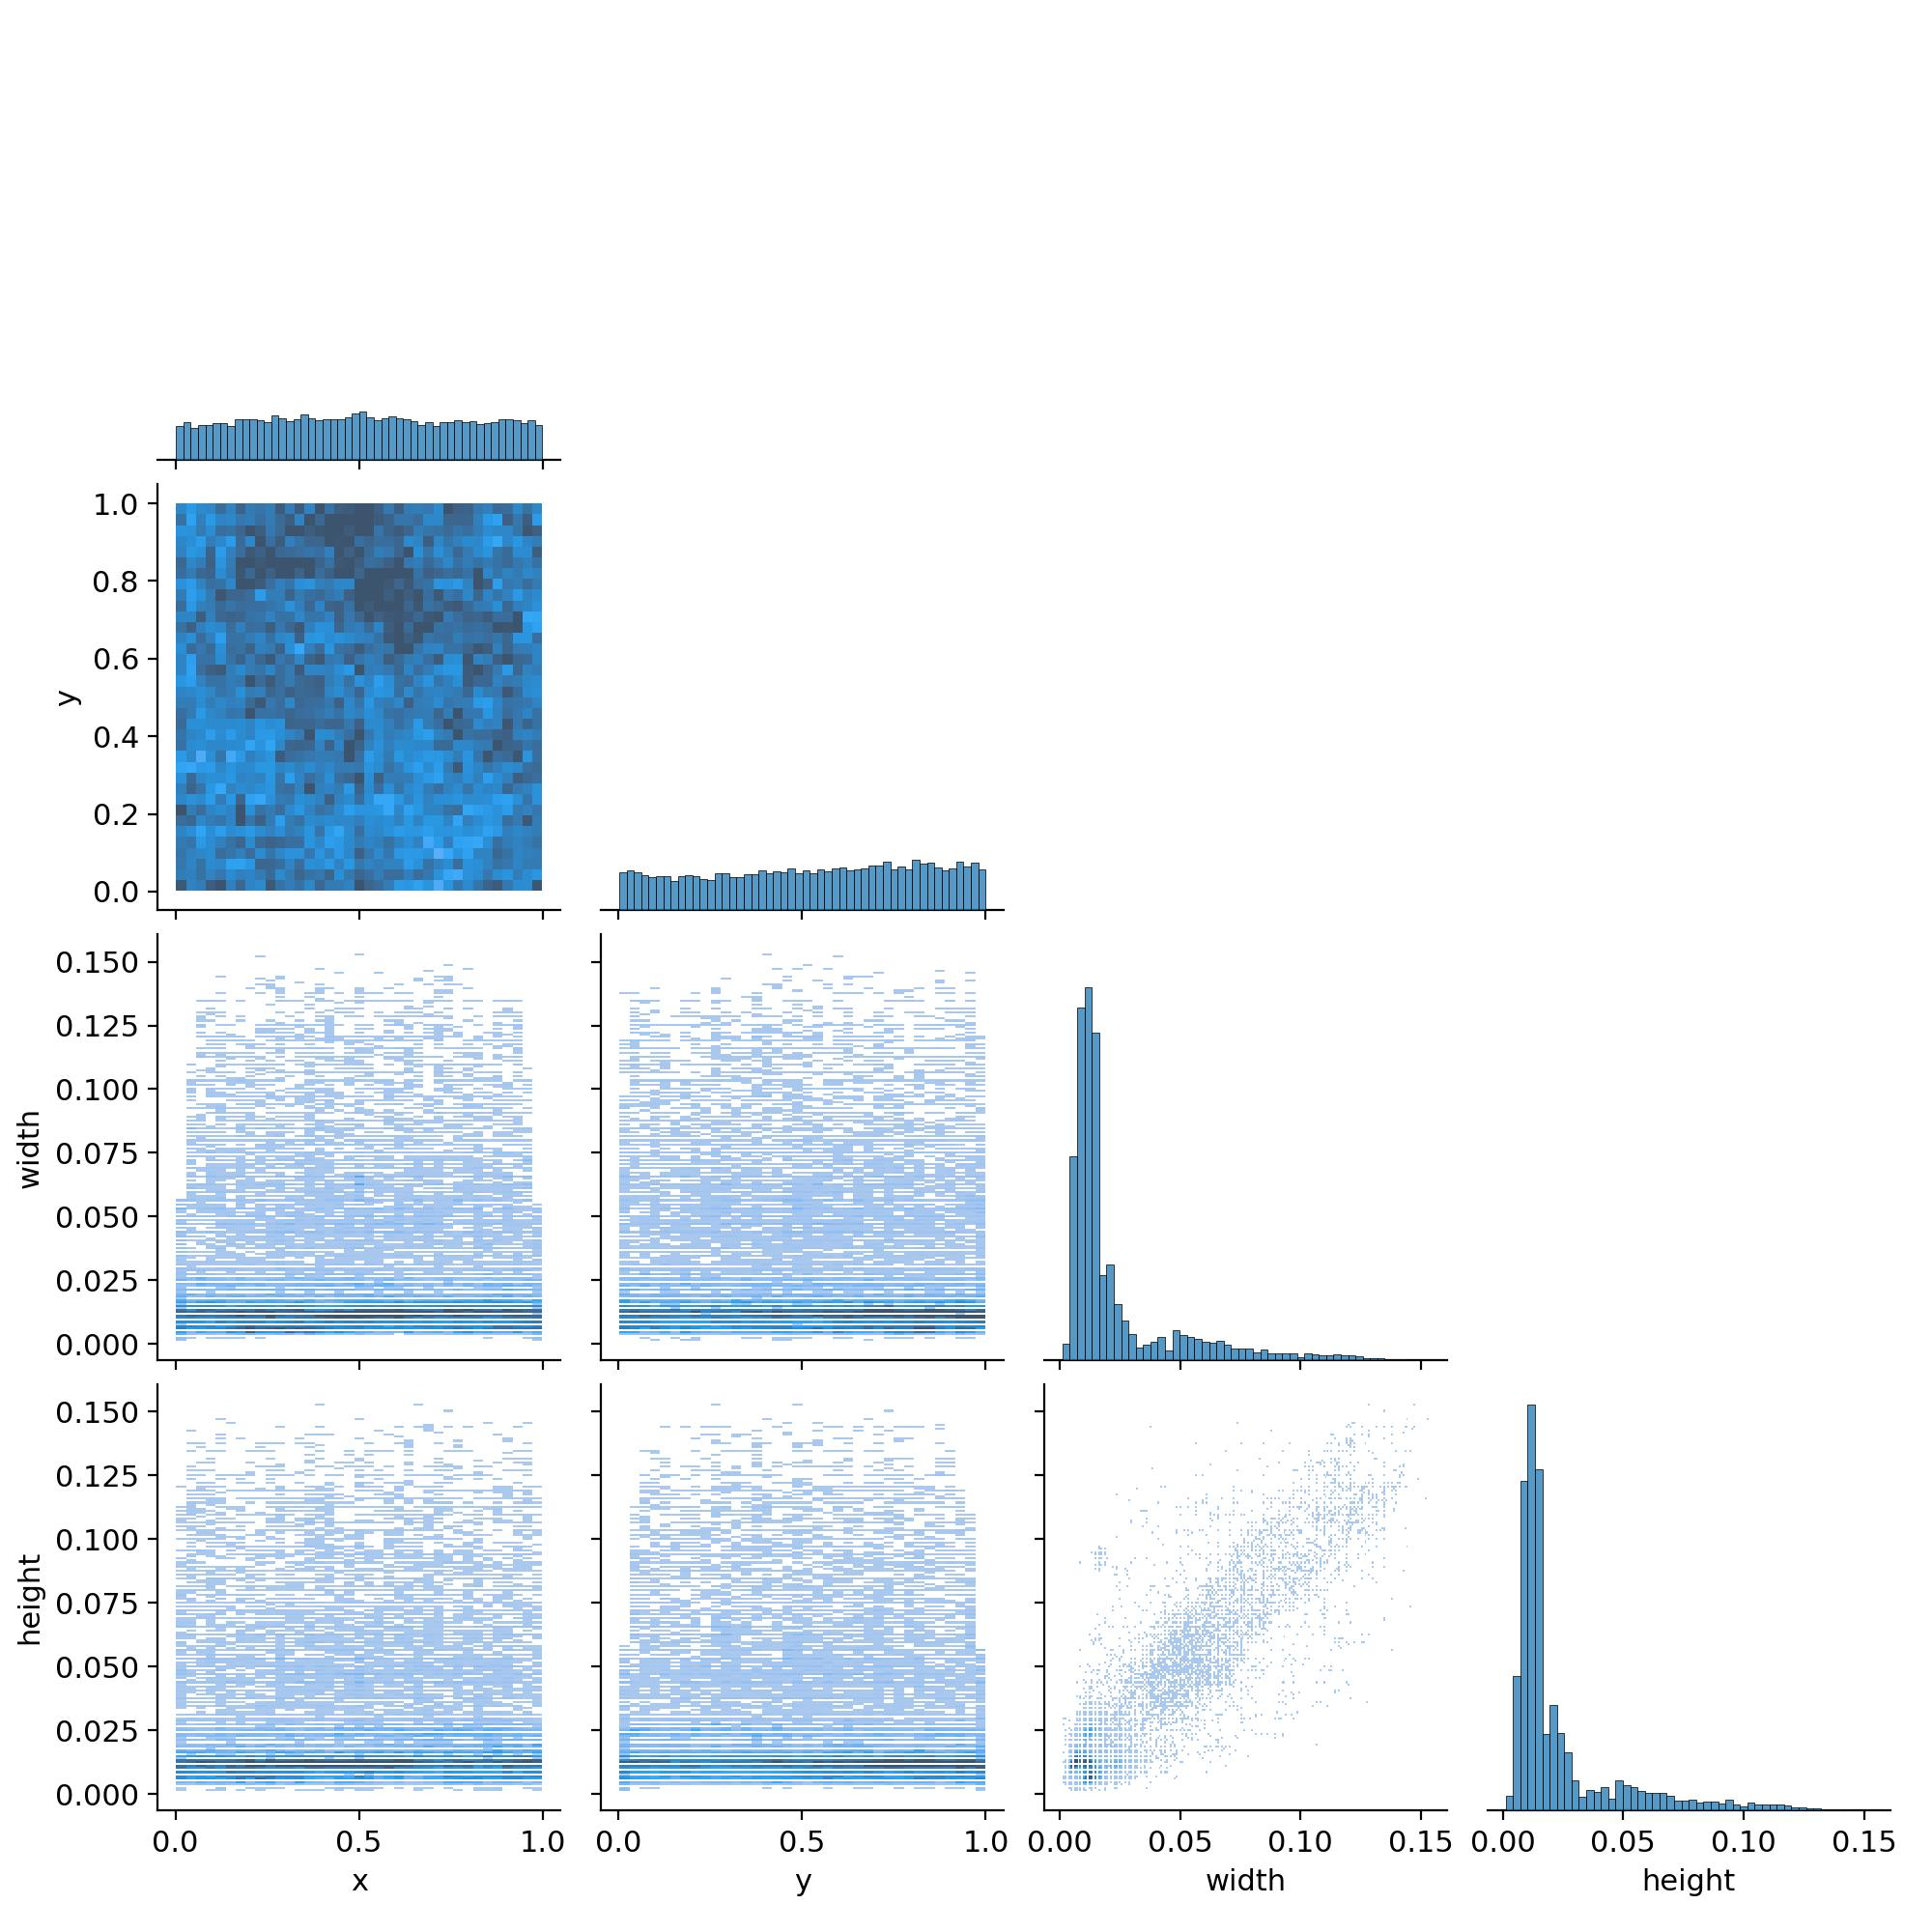

In [85]:
Image('./Yolov8-Results/labels_correlogram.jpg')

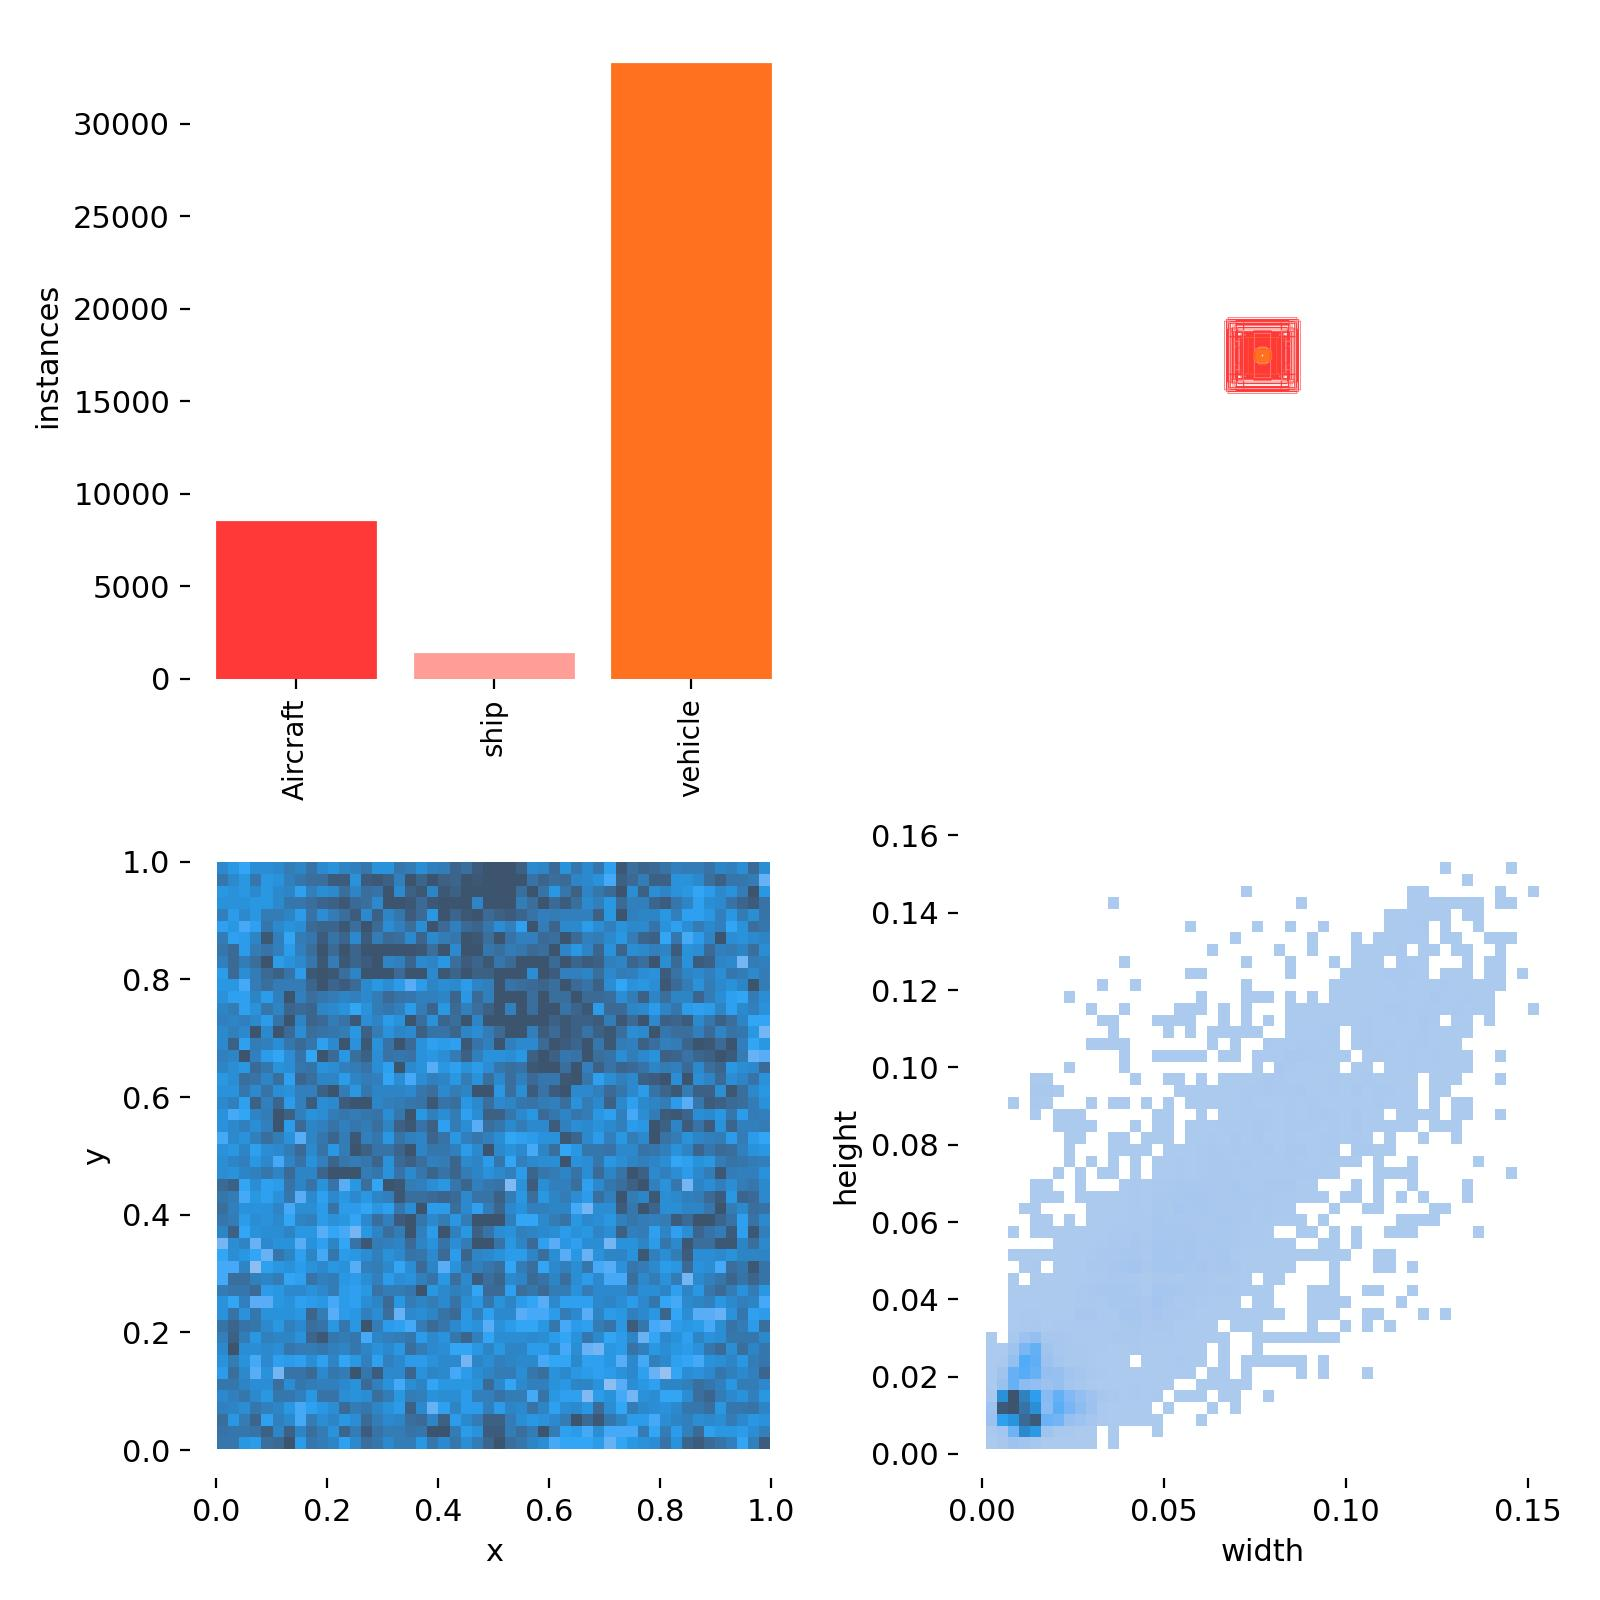

In [42]:
Image('./YOLOv8-Results/labels.jpg')

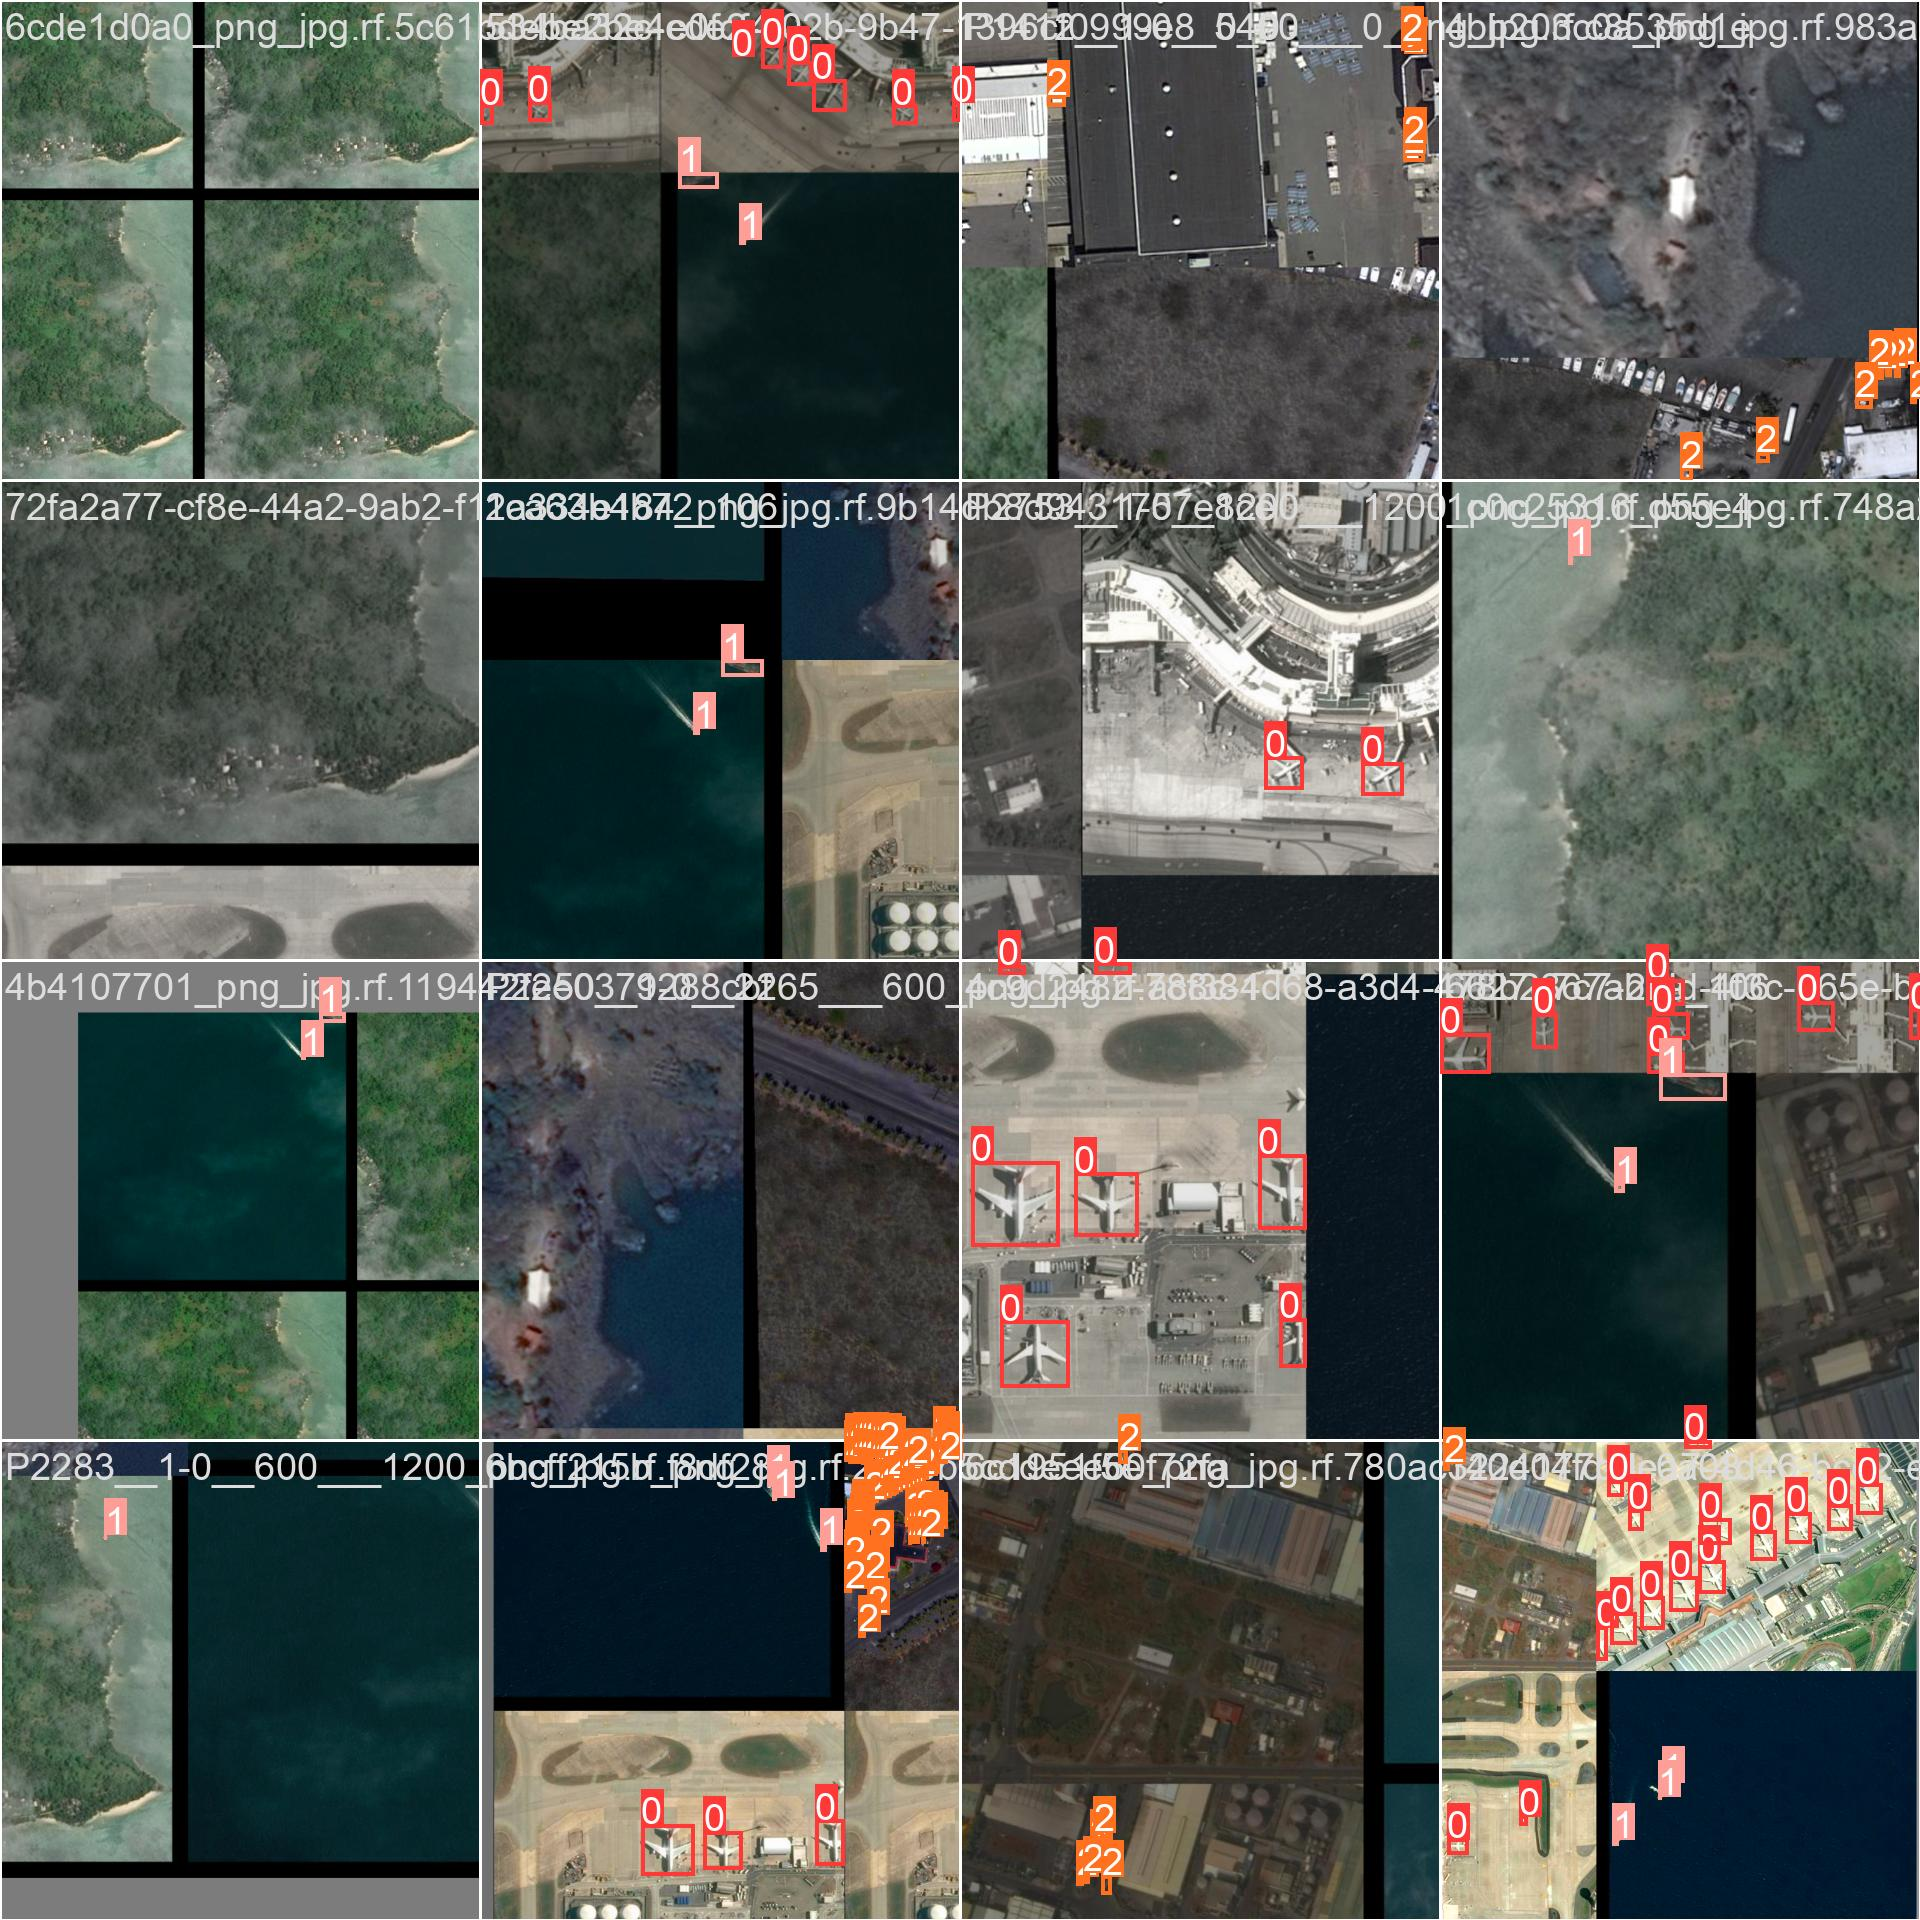

In [43]:
Image('./YOLOv8-Results/train_batch0.jpg')

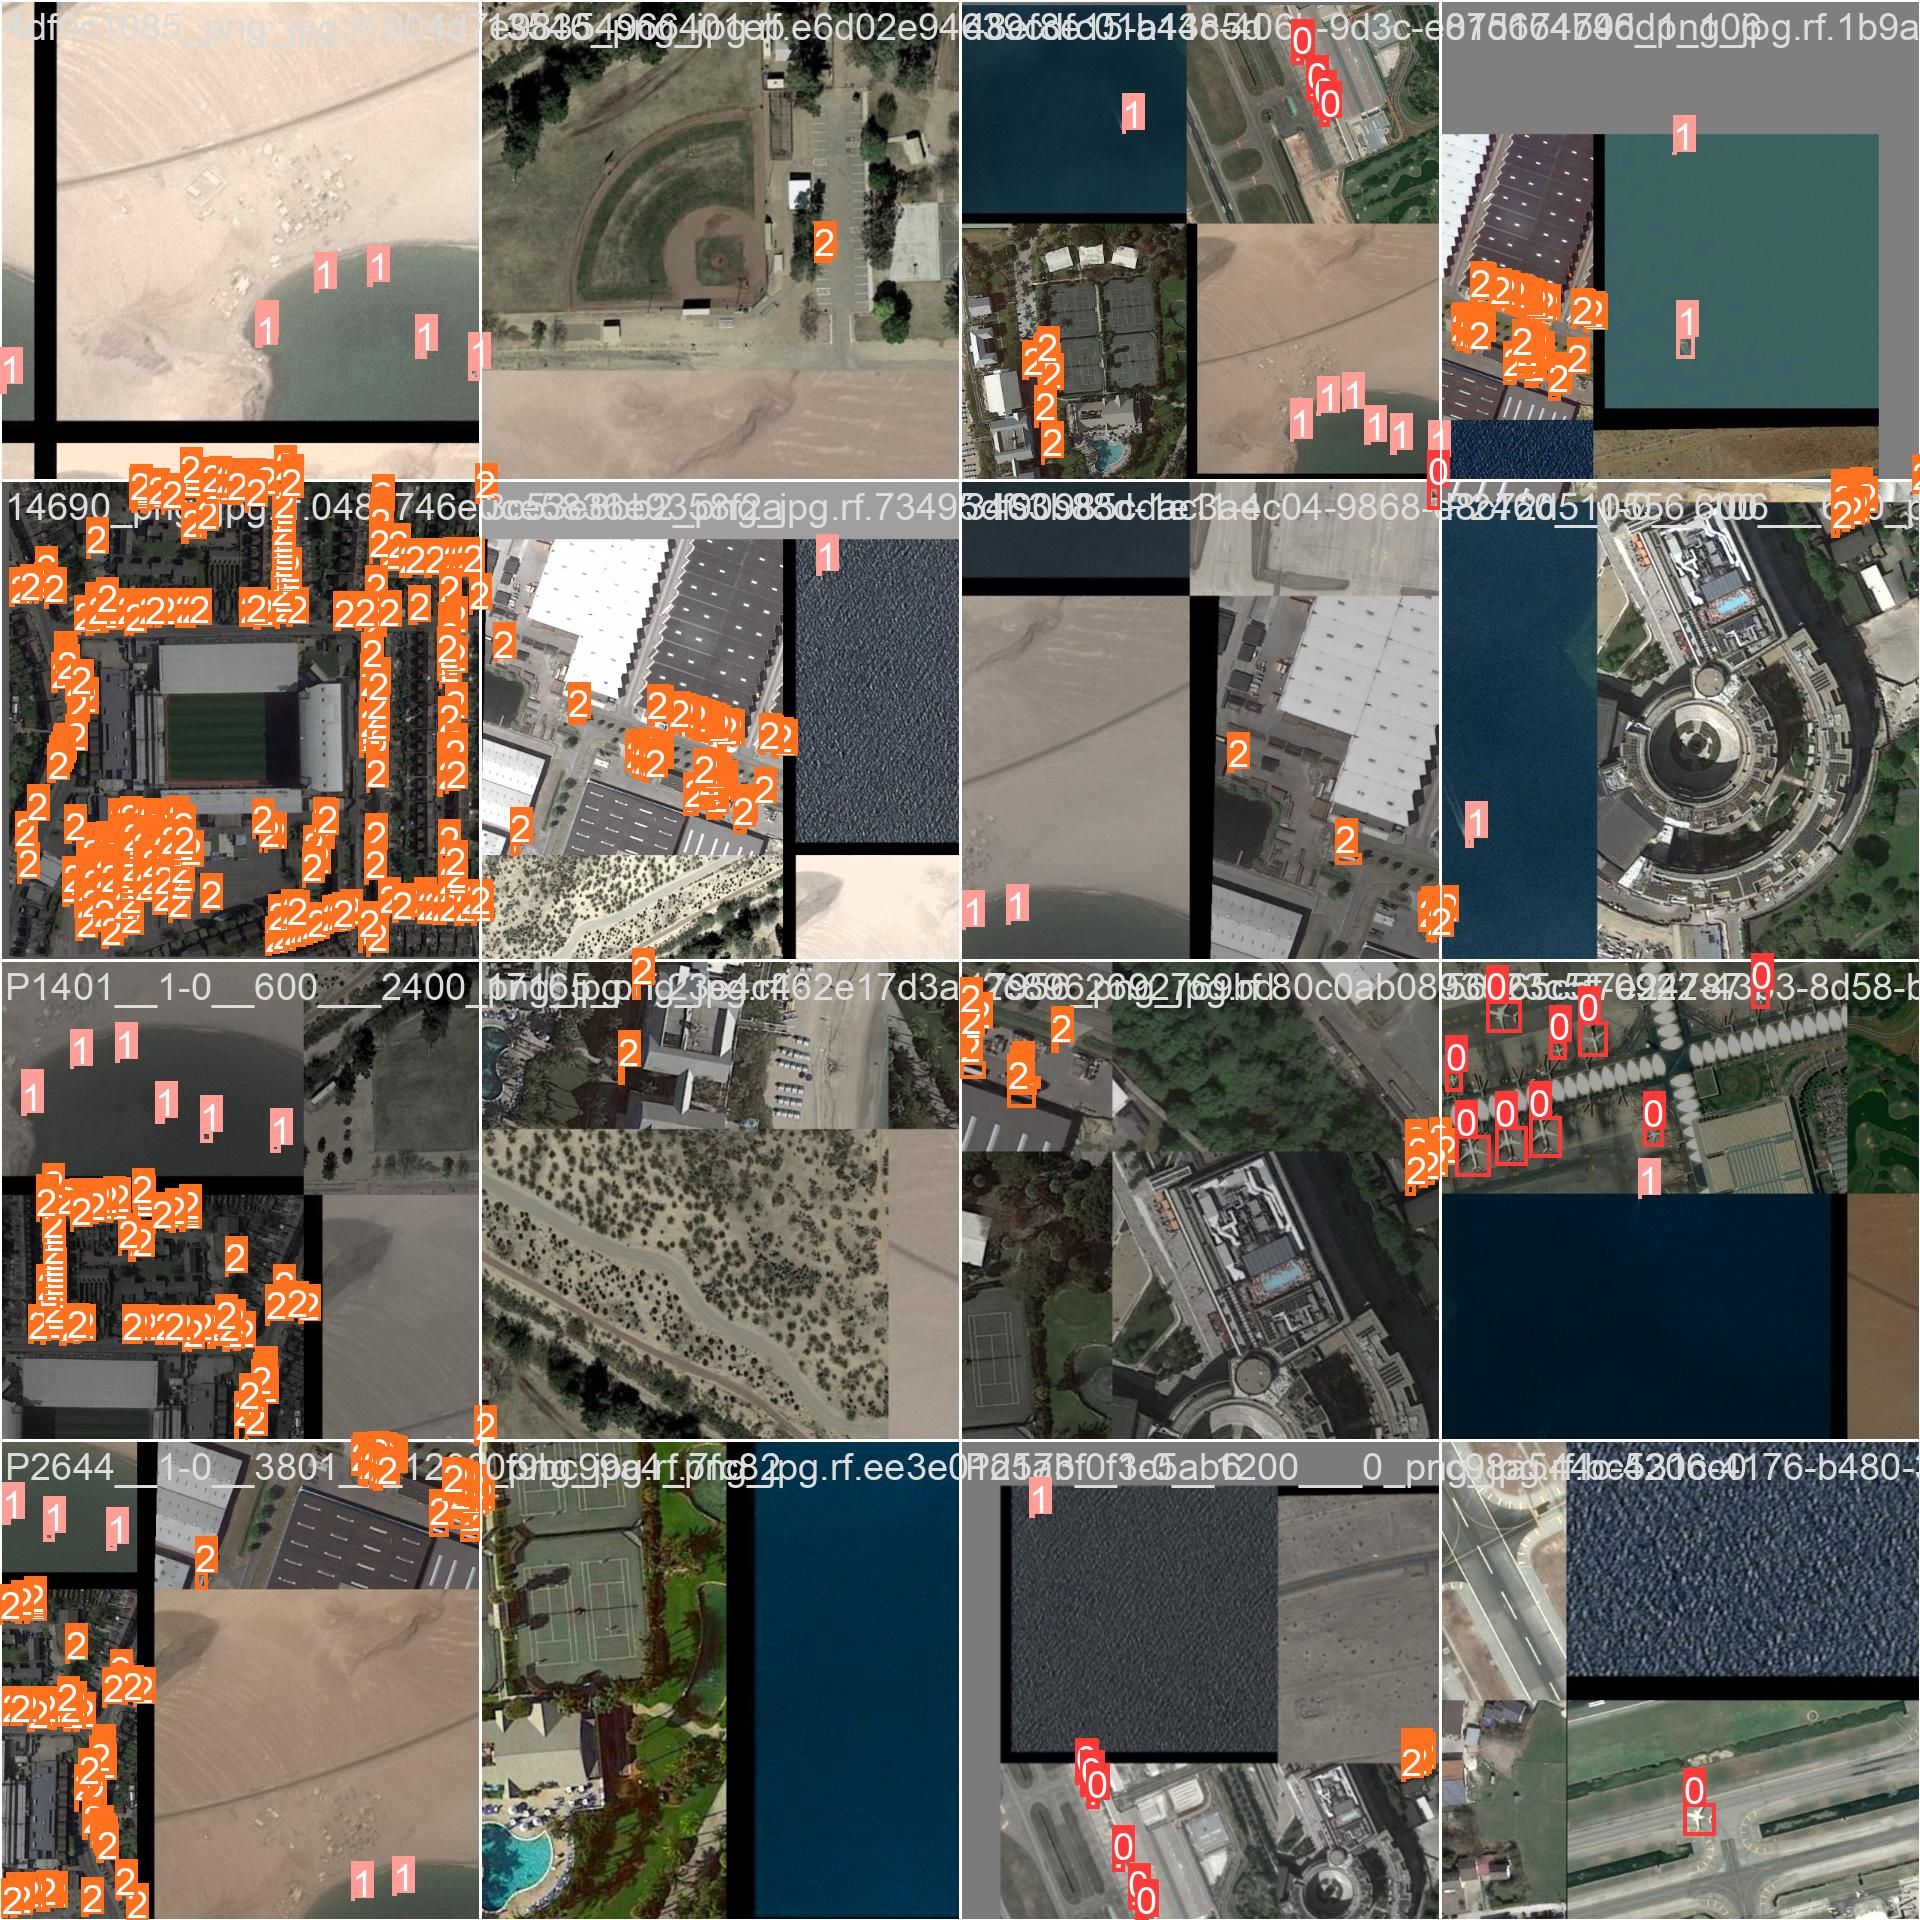

In [44]:
Image('./YOLOv8-Results/train_batch2.jpg')

In [49]:
yolov8_model_path = './Yolov8-Results/weights/best.pt'

detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov8",
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device= 'cpu',
)

In [66]:
from sahi.predict import get_prediction
result = get_prediction(img, detection_model)
result.export_visuals(export_dir="./demo_sahi_standard/")

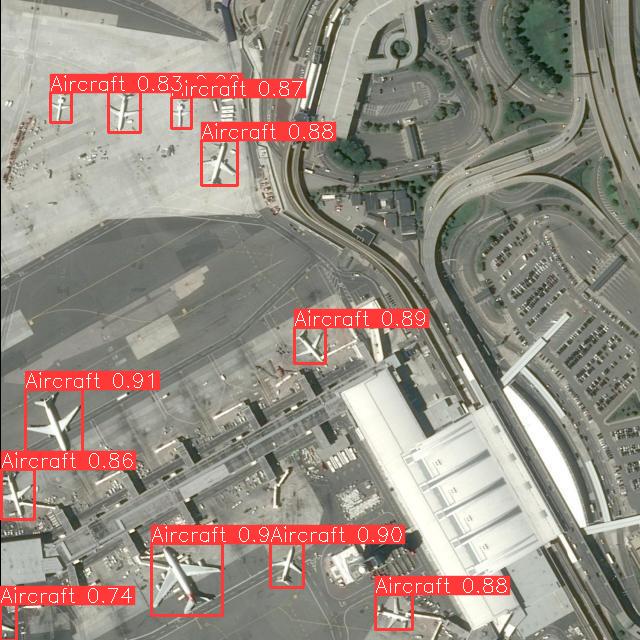

In [67]:
Image('./demo_sahi_standard/prediction_visual.png')

In [68]:
from sahi.predict import get_sliced_prediction

result = get_sliced_prediction(
    img,
    detection_model,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing prediction on 9 slices.


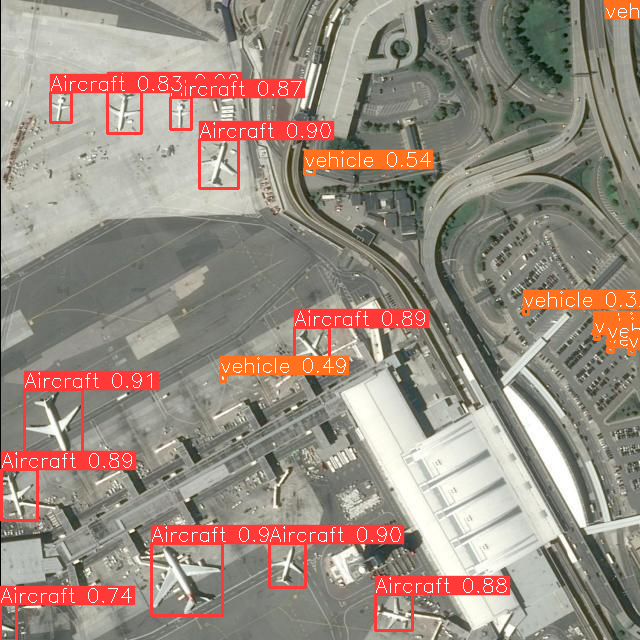

In [69]:
result.export_visuals(export_dir="./demo_sahi_slice/")
Image('./demo_sahi_slice/prediction_visual.png')


image 1/1 D:\BS(AI)\Practice\YOLO v8\SkyFusion-Aerial-Obj-Detection-1\valid\images\12527_png_jpg.rf.28db7c43d4ef63cdd35e3366f0c35d0a.jpg: 640x640 15 vehicles, 1105.0ms
Speed: 14.0ms preprocess, 1105.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\BS(AI)\Practice\YOLO v8\SkyFusion-Aerial-Obj-Detection-1\valid\images\03f84930-e2be-4c19-9afc-0dc26d02538e_0_1060_jpg.rf.b32f9d4f45cdf7e78b71118179410ef3.jpg: 640x640 8 Aircrafts, 1031.7ms
Speed: 8.0ms preprocess, 1031.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


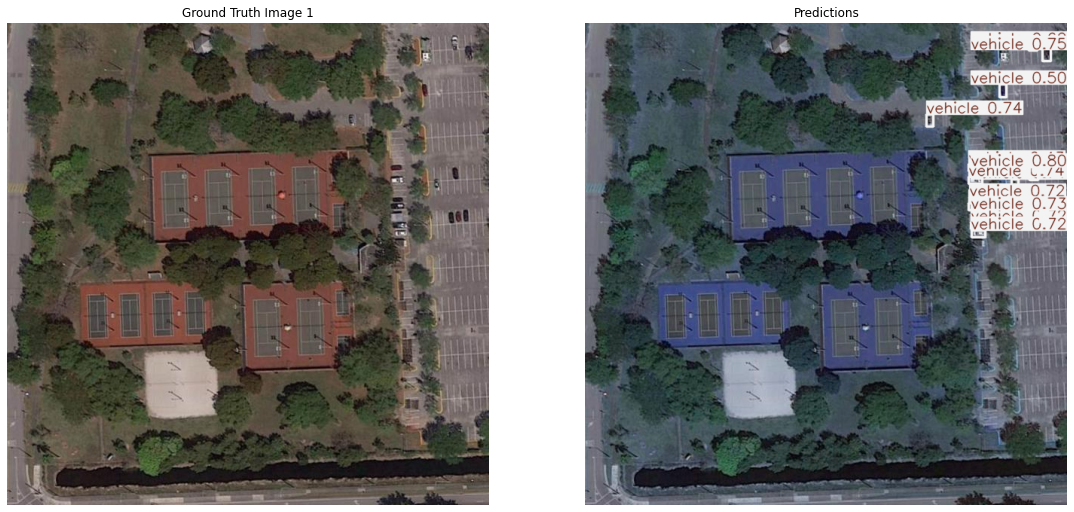

In [86]:
from PIL import Image

img_1 = './SkyFusion-Aerial-Obj-Detection-1/valid/images/12527_png_jpg.rf.28db7c43d4ef63cdd35e3366f0c35d0a.jpg'
label_1 = './SkyFusion-Aerial-Obj-Detection-1/valid/labels/12527_png_jpg.rf.28db7c43d4ef63cdd35e3366f0c35d0a.txt'
img_2 = './SkyFusion-Aerial-Obj-Detection-1/valid/images/03f84930-e2be-4c19-9afc-0dc26d02538e_0_1060_jpg.rf.b32f9d4f45cdf7e78b71118179410ef3.jpg'
label_2 = './SkyFusion-Aerial-Obj-Detection-1/valid/labels/03f84930-e2be-4c19-9afc-0dc26d02538e_0_1060_jpg.rf.b32f9d4f45cdf7e78b71118179410ef3.txt'

gt_image_1 = process_image(img_1, label_1, class_names)
gt_image_2 = process_image(img_2, label_2, class_names)

predicted_image_1 =  model.predict(source=img_1,conf=0.25)[0].plot()
predicted_image_2 =  model.predict(source=img_2,conf=0.25)[0].plot()

plt.figure(figsize=(19, 17))

plt.subplot(1, 2, 1)
plt.title("Ground Truth Image 1")
plt.imshow(gt_image_1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Predictions")
plt.imshow(predicted_image_1)
plt.axis('off')

plt.show()

Performing prediction on 9 slices.


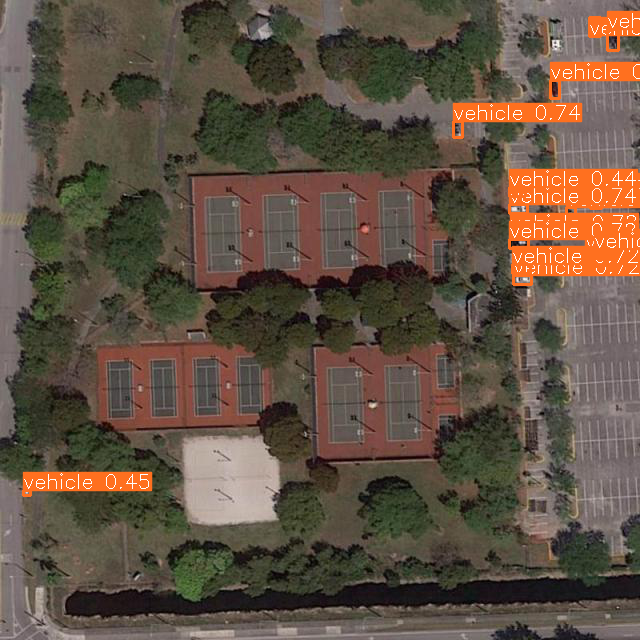

In [88]:
from IPython.display import display, Image # both of them have same name, (Image from PIL and Image from IPython.display)

result_1 = get_sliced_prediction(
    img_1,
    detection_model,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)
result_1.export_visuals(export_dir="./demo_sahi_slice/")
Image('./demo_sahi_slice/prediction_visual.png')

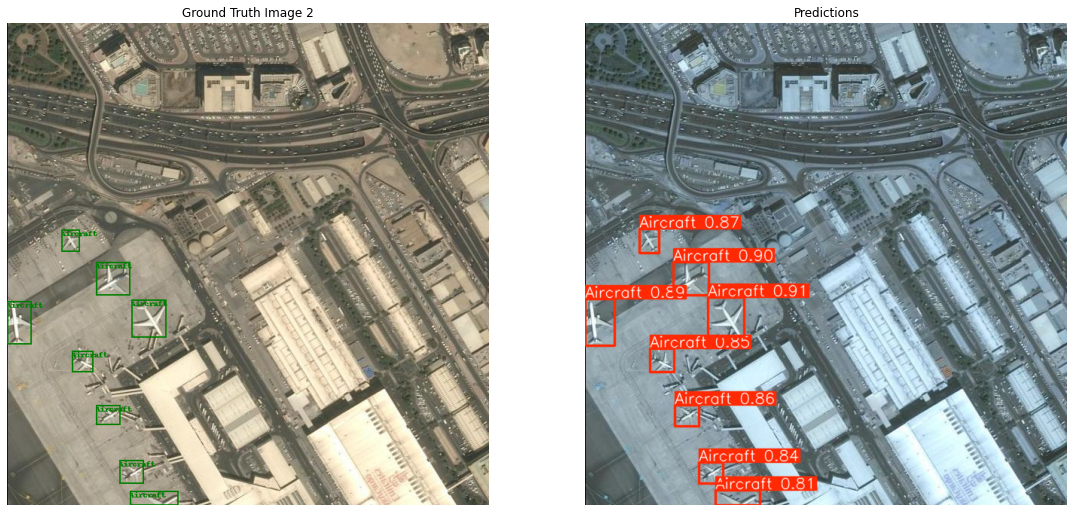

In [89]:
plt.figure(figsize=(19, 17))

plt.subplot(1, 2, 1)
plt.title("Ground Truth Image 2")
plt.imshow(gt_image_2)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Predictions")
plt.imshow(predicted_image_2)
plt.axis('off')

plt.show()

Performing prediction on 9 slices.


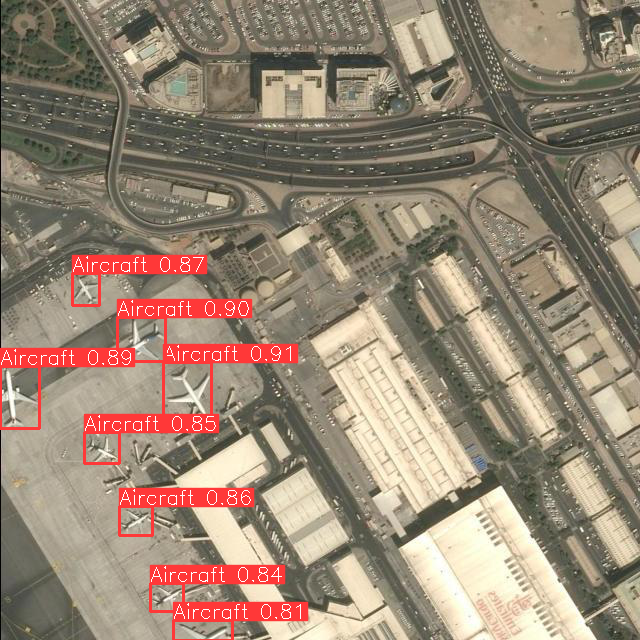

In [90]:
from IPython.display import display, Image 

result_2 = get_sliced_prediction(
    img_2,
    detection_model,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)
result_2.export_visuals(export_dir="./demo_sahi_slice/")
Image('./demo_sahi_slice/prediction_visual.png')